# Unit 5 - Financial Planning

In [13]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [14]:
# Load .env enviroment variables
load_dotenv()

True

In [15]:
# Find DotEnv
from dotenv import find_dotenv
print(find_dotenv())

/Users/mattbuchanan/Desktop/.env


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [19]:
# Set current amount of crypto assets
qnt_btc = 0.5
qnt_eth = 3

In [20]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [35]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]
# Compute current value of my crypto
my_btc_value = qnt_btc * btc_price
my_eth_value = qnt_eth * eth_price
wallet_balance = my_eth_value + my_btc_value
# Print current crypto wallet balance
print(f"The current value of your {qnt_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {qnt_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 0.5 BTC is $19435.36
The current value of your 3 ETH is $6936.38


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [36]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [71]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key, 
    alpaca_secret_key)

In [72]:
# Format current date as ISO format
start_date = pd.Timestamp("2011-06-04", tz = "America/new_york").isoformat()
end_date = pd.Timestamp("2021-06-04", tz = "America/new_york").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers_df = api.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Preview DataFrame
tickers_df


AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2017-06-15 00:00:00-04:00  109.90  109.90  109.780  109.870  1938779  242.68   
2017-06-16 00:00:00-04:00  109.86  109.97  109.850  109.945  1709677  242.77   
2017-06-19 00:00:00-04:00  109.87  109.90  109.740  109.790  1375531  243.59   
2017-06-20 00:00:00-04:00  109.85  110.03  109.800  109.975  2010628  244.25   
2017-06-21 00:00:00-04:00  109.88  110.04  109.880  109.980  1085301  243.43   
...                           ...     ...      ...      ...      ...     ...   
2021-05-28 00:00:00-04:00  114.55  114.68  114.500  114.510  6186451  420.97   
2021-06-01 00:00:00-04:00  114.40  114.40  114.164  114.340  5655159  422.57   
2021-06-02 00:00:00-04:00  114.45  114.51  114.300  114.485  5649317  420.37   
2021-06-03 00:00:00-04:00  114.31  114.46  114.210  114.210  3270096  417.87   
2021-06-04 00:00:00-04:00  114.39  114.67  114.220  114.665  4334878  420.75   

                                                               
                             high       low   close    volume  
time                                                           
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64  42503652  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04  39203167  
2017-06-21 00:00:00-04:00  243.59  242.4100  242.95  42746920  
...                           ...       ...     ...       ...  
2021-05-28 00:00:00-04:00  421.25  419.7900  420.02  49200328  
2021-06-01 00:00:00-04:00  422.72  419.2000  419.63  47607950  
2021-06-02 00:00:00-04:00  421.23  419.2900  420.38  41250387  
2021-06-03 00:00:00-04:00  419.99  416.2800  418.86  51582905  
2021-06-04 00:00:00-04:00  422.92  418.8422  422.57  45129316  

[1000 rows x 10 columns]

In [73]:
# Pick AGG and SPY close prices
agg_close_price = tickers_df["AGG"]["close"].iloc[-1]
spy_close_price = tickers_df["SPY"]["close"].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.665
Current SPY closing price: $422.57


In [74]:
# Compute the current value of shares
my_agg_value = my_agg * current_agg_close
my_spy_value = my_spy * current_spy_close


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21128.50
The current value of your 200 AGG shares is $22933.00


### Savings Health Analysis

In [75]:
# Set monthly household income
household_income_monthly = 2000
# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]
crypto_wallet = my_btc_value + my_btc_value
stocks = my_agg_value + my_spy_value
# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,26371.73982
shares,44061.50000


<AxesSubplot:ylabel='amount'>

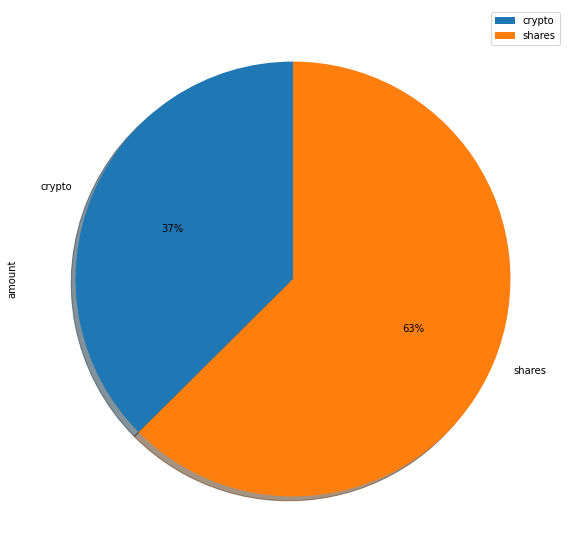

In [76]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", figsize=(15,10), autopct='%0.f%%', shadow=True, startangle=90)

In [77]:
# Set ideal emergency fund
emergency_fund = household_income_monthly * 3

# Calculate total amount of savings
savings_value = crypto_wallet + stocks
# Validate saving health
# YOUR CODE HERE!

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [61]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [82]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = alpaca.get_barset(
tickers,
timeframe,
start=start_date,
end=end_date,
limit=1000
).df

# Display sample data
df_ticker.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-06-14 00:00:00-04:00  110.00  110.18  109.85  109.950  2304819.0     NaN   
2017-06-15 00:00:00-04:00  109.90  109.90  109.78  109.870  1938779.0  242.68   
2017-06-16 00:00:00-04:00  109.86  109.97  109.85  109.945  1709677.0  242.77   
2017-06-19 00:00:00-04:00  109.87  109.90  109.74  109.790  1375531.0  243.59   
2017-06-20 00:00:00-04:00  109.85  110.03  109.80  109.975  2010628.0  244.25   

                                                                 
                             high       low   close      volume  
time                                                             
2017-06-14 00:00:00-04:00     NaN       NaN     NaN         NaN  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068.0  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243.0  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64  42503652.0  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04  39203167.0

In [88]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Stock_Sim30 = MCSimulation(
    portfolio_data = tickers_df,
    weights = [.5, .5],
    num_simulation = 500
    num_trading_days = 252*30
)

SyntaxError: invalid syntax (<ipython-input-88-281f10e8d7c4>, line 6)

In [89]:
# Printing the simulation input data
MC_Stock_Sim30.portfolio_data.head()

NameError: name 'MC_Stock_Sim30' is not defined

In [90]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Stock_Sim30.calc_cumulative_return()

NameError: name 'MC_Stock_Sim30' is not defined

In [91]:
# Plot simulation outcomes
MC_Stock_Sim30.plot_simulation()

NameError: name 'MC_Stock_Sim30' is not defined

In [28]:
# Plot probability distribution and confidence intervals
MC_Stock_Sim30.plot_distribution()

NameError: name 'MC_Stock_Sim30' is not defined

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_summary = MC_Stock_Sim30.summarise_cumulative_return()

# Print summary statistics
stocks_tbl

NameError: name 'MC_Stock_Sim30' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stock_summary[8] * initial_investment, 2)
ci_upper = round(stock_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'stock_summary' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
lower_ci = round(stock_summary[8] * initial_investment, 2)
upper_ci = round(stock_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'stock_summary' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [97]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [98]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [99]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [100]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [101]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [102]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [104]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

NameError: name 'ci_lower_ten' is not defined